## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Conclusion](#conclusions)

<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [5]:
rows = 294478
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


c. The number of unique users in the dataset.

In [4]:
df.user_id.nunique()

290584

d. The proportion of users converted.

In [6]:
(df.converted.sum()/290584).round(4)

0.1213

e. The number of times the `new_page` and `treatment` don't line up.

In [10]:
df.query('group == "treatment" and landing_page != "new_page"').shape[0]

1965

In [13]:
df.query('group == "control" and landing_page != "old_page"').shape[0]

1928

In [14]:
1928+1965

3893

f. Do any of the rows have missing values?

No, all have 294 478 non-null entries.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [3]:
df2 = df.query('(group == "treatment" and landing_page == "new_page") or (group == "control" and landing_page == "old_page")')
df2.shape

(290585, 5)

In [4]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [19]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?
[SO: source-link](https://stackoverflow.com/questions/20199129/pandas-get-duplicated-indexes)

In [37]:
repeat_user = df2[df2.duplicated(subset = 'user_id', keep = False)] 

c. What is the row information for the repeat **user_id**? 

In [38]:
repeat_user

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [5]:
df2 = df2.drop_duplicates(subset = 'user_id', keep = 'last')

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [6]:
conv_rate = df.converted.mean()
conv_rate

0.11965919355605512

b. Given that an individual was in the `control` group, what is the probability they converted?

In [52]:
df2[df2.group == 'control'].converted.mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [54]:
df2[df2.group == 'treatment'].converted.mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [55]:
(df2.landing_page == 'new_page').mean()

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**We looked at both groups and the size of each group, we see the sample isn't dominated by one group and assume there is no evidence of the Simpson paradox at play. Looking at how close the means are, and that the old page outperforms the new one by tiny fraction, I would think that the new page is not an improvement.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**$$H_0: P_{new} - P_{old} <= 0$$  $$H_1: P_{new} - P_{old} > 0$$**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [7]:
p_new = conv_rate #the rate under ab_data
p_new

0.11965919355605512

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [8]:
p_old = p_new

c. What is $n_{new}$?

In [9]:
n_new = df2[df2.group == 'treatment'].shape[0]
n_new

145310

d. What is $n_{old}$?

In [10]:
n_old =  df2[df2.group == 'control'].shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [90]:
new_page_converted = []
for _ in range(1):
    b_samp = df.sample(n_new, replace = True)
    new_conv_rate = b_samp.converted.mean()
    new_page_converted.append(new_conv_rate)
new_page_converted = np.array(new_page_converted)

In [91]:
new_page_converted.mean()

0.1183263367971922

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [92]:
old_page_converted = []
for _ in range(1):
    b_samp = df.sample(n_old, replace = True)
    old_conv_rate = b_samp.converted.mean()
    old_page_converted.append(old_conv_rate)
old_page_converted = np.array(old_page_converted)

In [93]:
old_page_converted.mean()

0.11888569186502747

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [94]:
new_page_converted.mean() - old_page_converted.mean()

-0.0005593550678352627

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [16]:
new_page_conv_rate = np.random.binomial(n_new, p_new, 10000)/n_new
old_page_conv_rate = np.random.binomial(n_old, p_old, 10000)/n_old
p_diffs = new_page_conv_rate - old_page_conv_rate

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

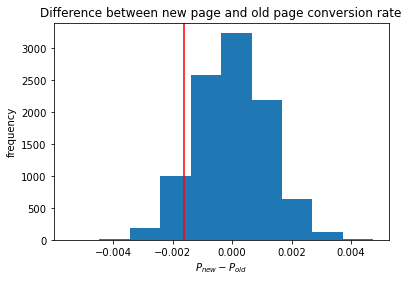

In [119]:
plt.hist(p_diffs);
plt.title('Difference between new page and old page conversion rate');
plt.xlabel('$P_{new} - P_{old}$'),
plt.ylabel('frequency');
plt.axvline(x=(0.1188 - 0.1204), color='r')

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [120]:
(p_diffs > (0.1188 - 0.1204) ).mean()

0.9097

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**We compute the p-value by looking at our alternative that has the '>' sign, we then take the number of means in the difference between sampling distributions that fall above our sample difference and divide by the total. Shading to the right of the red line we get the same idea visually. Our alternative being that the difference is above 0 has approximately 9% of our means falling in that extreme.** 

**With a p-value above 0.05 we fail to reject the null, and the assumption that the old page is equal or better in conversion holds true in this case.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [18]:
import statsmodels.api as sm

convert_old = df2[df2.group == 'control'].converted.sum()
convert_new = df2[df2.group == 'treatment'].converted.sum()
# n_old = 
# n_new = 
convert_old, convert_new, n_old, n_new

(17489, 17264, 145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here (archived)](http://web.archive.org/web/20190226200315/http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [19]:
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative='larger')
z_score, p_value

(-1.3109241984234394, 0.9050583127590245)

In [20]:
from scipy.stats import norm

norm.cdf(z_score)
# 0.09494168724097551 # Tells us how significant our z-score is

0.09494168724097551

In [39]:
norm.ppf(1-(0.05))
# 1.6448536269514722 # Tells us what our critical value at 95% confidence is with one right tailed test

1.6448536269514722

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**In regards to this z-test, we get a p-value of 0.905, our z-score tells us the difference is 1.311 standard deviations below the mean, with:   
$H_0 <= 0$ we have mean standard distribution with center at 0, and difference that falls. This concurs with the p-value and we fail to reject the null.**

**We say that the z_score of -1.3 falls below the critical value of 1.645 and this is further evidence for failing to reject the null.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**We have a binary response variable, we will use logistic regression model.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [27]:
df2['intercept'] = 1

In [28]:
df2[['control','ab_page']] = pd.get_dummies(df2['group'])
df2 = df2.drop(columns=['control'])

In [14]:
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [143]:
mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
res = mod.fit()
res.summary2()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212780.3502
Date:               2021-12-31 05:06 BIC:              212801.5095
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           1                LL-Null:          -1.0639e+05
Df Residuals:       290582           LLR p-value:      0.18988    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [147]:
1/np.exp(-0.0150), np.exp(-0.0150)

(1.015113064615719, 0.9851119396030626)

In [159]:
pd.to_datetime(df2.timestamp.max()) - pd.to_datetime(df2.timestamp.min())

Timedelta('21 days 23:59:49.081927')

New page is 0.98 times as likely to convert as the old page, holding all other variables constant.  

Said in another way: someone using the old page is 1.015 times more likely to convert compared to the using the new page, holding all other variables constant.

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br> 

**My p-value is the same at 0.1899, as my null under the regression models is = and the alternative !=. Just as it was in part II.**

**Assuming the question is targeted at what I answered in part II, the change in the null and alternative created new parameters for the p-value as I would shade the tails instead of one extreme under part I.**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Our group variable is the same as in landing_page and ab_page, we have timestamp as the only unused variable.**
  
**If we had many variables and were using linear regression, we might have added higher order terms.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

In [29]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [30]:
df_new.country.value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [31]:
### Create the necessary dummy variables
df_new[['CAN','UK', 'US']] = pd.get_dummies(df_new['country'])

In [204]:
mod = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'UK','CAN']])
res = mod.fit()
res.summary2()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212781.1253
Date:               2021-12-31 06:24 BIC:              212823.4439
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           3                LL-Null:          -1.0639e+05
Df Residuals:       290580           LLR p-value:      0.17599    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9893    0.0089  -223.7628  0.0000  -2.0067  -1.9718
ab_page      -0.0149    0.0114    -1.3069  0.1912  -0.0374   0.0075
UK            0.0099    0.0133     0.7433  0.4573  -0.0162   0.0359
CAN          -0.0408    0.0269    -1.5161  0.1295  -0.0934   0.0119
==================================================================

"""

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - Provide the statistical output as well as a written response to answer this question.

In [205]:
np.exp([0.0099, -0.0408]), 1/np.exp(-0.0408)

(array([1.00994917, 0.96002111]), 1.0416437559600236)

**UK users are 1.01 times more likely than the baseline US users to convert,   
while US users are 1.04 times more likely to convert compared to Canadian users, holding all other variables constant.**
  
**As expected of the small difference in the case of the UK users the P-value is .457, and while the difference between US and Canadian users is large, it's not significant. We fail to reject the null, as none of the p-values are below the 0.05 line.**

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [32]:
df_new['CAN_page'] = df_new['CAN'] * df_new['ab_page']
df_new['UK_page'] = df_new['UK'] * df_new['ab_page']
df_new['US_page'] = df_new['US'] * df_new['ab_page']

In [33]:
mod = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'UK', 'CAN', 'UK_page', 'CAN_page']])
res = mod.fit()
res.summary2()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212782.6602
Date:               2022-01-01 01:17 BIC:              212846.1381
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           5                LL-Null:          -1.0639e+05
Df Residuals:       290578           LLR p-value:      0.19199    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9865    0.0096  -206.3440  0.0000  -2.0053  -1.9676
ab_page      -0.0206    0.0137    -1.5052  0.1323  -0.0473   0.0062
UK           -0.0057    0.0188    -0.3057  0.7598  -0.0426   0.0311
CAN          -0.0175    0.0377    -0.4652  0.6418  -0.0914   0.0563
UK_page       0.0314    0.0266     1.1807  0.2377  -0.0207   0.0835
CAN_page     -0.0469    0.0538    -0.8718  0.3833  -0.1523   0.0585
==================================================================

"""

In [34]:
1/np.exp([-0.0057, -0.0175, -0.0469]),np.exp([0.0314])

(array([1.00571628, 1.01765402, 1.0480172 ]), array([1.03189818]))

Rather than just looking at countries in comparison to eachother (baseline US), we want to know if in a given country the page you receive plays a role in the conversion rate compared with the baseline (US_page). We can look at the interaction between pages and countries and the corresponding p-values.


Compared to the baseline, the page Canadian users land on relates to conversion, holding all other variables constant. At 0.383 it's not significant. While this relationship is stronger for UK userbase with p-value of 0.234, it's also not statistically significant. We fail to reject the null.


The new model suggests there is a larger overlap between US and Canada users convertion rate based on the page they receive, the UK users and US users means overlap a lot less, but not significant. Between 2 pages that have the same conversion rates, we can rule out the  users country having significance in the interaction between conversion rates and page.

**There is nothing to suggest that the new page is an improvement on the old in converting users.
We should therefore not change the page if our goal is to increase conversion. 
Although we are not seeing a practically significant negative effect on our conversion rates, should we be using more time on this?**

Seeing how these numbers change from week 1 through week 4 would be interesting, and would give us a much stronger basis to continue or end the tests.

In the section below we will do this, to see if there is a basis for continuing our tests.

In [41]:
def week_nr(data):
    return pd.to_datetime(data).week

df_new['week'] = df_new.apply(lambda x: week_nr(x['timestamp']), axis = 1, result_type='expand')
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,week
user_id,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,2
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,4
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,3
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,3
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,3


In [56]:
df_new[['week_1', 'week_2', 'week_3', 'week_4']] = pd.get_dummies(df_new['week'])
df_new['week'].value_counts()

2    92583
3    92293
1    84924
4    20784
Name: week, dtype: int64

In [57]:
mod = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'week_2','week_3', 'week_4']])
res = mod.fit()
res.summary2()

Optimization terminated successfully.
         Current function value: 0.366112
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212782.7941
Date:               2021-12-31 19:08 BIC:              212835.6923
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           4                LL-Null:          -1.0639e+05
Df Residuals:       290579           LLR p-value:      0.26026    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9979    0.0120  -165.8628  0.0000  -2.0216  -1.9743
ab_page      -0.0150    0.0114    -1.3076  0.1910  -0.0374   0.0075
week_2        0.0018    0.0147     0.1206  0.9040  -0.0270   0.0306
week_3        0.0195    0.0147     1.3308  0.1833  -0.0092   0.0482
week_4        0.0328    0.0237     1.3830  0.1667  -0.0137   0.0792
==================================================================

"""

In [61]:
np.exp([0.0018, 0.0195, 0.0328])

array([1.00180162, 1.01969137, 1.03334385])

In [66]:
wk4_first_day = df_new[df_new['week'] == 4].timestamp.min()
wk4_last_day = df_new[df_new['week'] == 4].timestamp.max()
(pd.to_datetime(wk4_last_day)-pd.to_datetime(wk4_first_day))

Timedelta('1 days 13:41:54.433820')

Compared to week 1 baseline we are 1.0018 times more likely to convert users in week 2, holding all other variables constant.  
With a p-value of 0.904 we fail to reject the null and hold that there is no difference between conversion rates of the 2 pages.


For week 3, this number has increased to 1.0197, and the p-value has decreased to 0.1833, still we fail to reject the null, but had we been asked if we should continue the ab-test, this would have been a strong indication that we should.  


For week 4 our multiplicative change in the odds of converting increases again, to 1.0334. With p-value of decreasing to 0.1667, compared to the baseline of week 1. We fail to reject the null, but wish to continue this experiment.

<a id='conclusions'></a>
## Conclusions
**Is three weeks enough to acclimate to change?**
We note that the duration of the 4th week of the experiment being approximately 1 day and 14 hours.
Seeing the upward trend of conversion rates and downward trend of p-value in this short time, we want to continue with the tests and see there is bias from change aversion or novelty effect.

We would therefore have to recommend a continuation of these tests until we see our weekly results stabilizing or the null being rejected.


In this project we see that we can reach one conclusion based on our measurements and tests, but including one more measurements can give us a completely different result. Excluding time from the measurement would leave us with a lot less insight into how our sample is evolving and make us reach the wrong conclusion.

##### Sources:
The ones included in the cells above, but mostly re-using the material from the previous lessons.